In [2]:
import os
import numpy as np
import librosa
import soundfile as sf
from tqdm import tqdm

In [3]:
import audioread

In [4]:

# def get_audio_lengths(directory):
#     """Get lengths of all audio files in the directory."""
#     lengths = []
#     for root, _, files in os.walk(directory):
#         for file in files:
#             if file.endswith('.wav'):
#                 filepath = os.path.join(root, file)
#                 y, sr = librosa.load(filepath, sr=None)
#                 lengths.append(len(y) / sr)  # Duration in seconds
#     return np.array(lengths)

# def compute_target_length(lengths, percentile=90):
#     """Compute target length based on the given percentile."""
#     return np.percentile(lengths, percentile)

# def process_audio(signal, target_length, sr):
#     """Pad or truncate audio to match the target length."""
#     target_samples = int(target_length * sr)

#     # Truncate or pad the signal
#     if len(signal) > target_samples:
#         start = (len(signal) - target_samples) // 2
#         signal = signal[start:start + target_samples]
#     else:
#         signal = np.pad(signal, (0, target_samples - len(signal)), mode='constant')
    
#     return signal

# def normalize_audio_lengths(src_dir, dest_dir, target_length):
#     """Normalize all audio files and save to the modified dataset directory."""
#     if not os.path.exists(dest_dir):
#         os.makedirs(dest_dir)

#     for root, _, files in os.walk(src_dir):
#         for file in tqdm(files):
#             if file.endswith('.wav'):
#                 src_path = os.path.join(root, file)
#                 relative_path = os.path.relpath(root, src_dir)
#                 dest_path = os.path.join(dest_dir, relative_path)

#                 # Create destination subfolder if not exists
#                 os.makedirs(dest_path, exist_ok=True)

#                 # Load audio
#                 y, sr = librosa.load(src_path, sr=None)
                
#                 # Process and save audio
#                 processed_signal = process_audio(y, target_length, sr)
#                 sf.write(os.path.join(dest_path, file), processed_signal, sr)

In [5]:

def get_audio_lengths(directory):
    """Get lengths of all audio files in the directory."""
    lengths = []
    for root, _, files in os.walk(directory):
        for file in tqdm(files, desc = 'Loading Files'):
            if file.endswith('.wav'):
                filepath = os.path.join(root, file)
                y, sr = librosa.load(filepath)
                lengths.append(len(y) / sr)  # Duration in seconds
    return np.array(lengths)

def compute_target_length(lengths, percentile=90):
    """Compute target length based on the given percentile."""
    return np.percentile(lengths, percentile)

def process_audio(signal, target_length, sr):
    """Pad or truncate audio to match the target length."""
    target_samples = int(target_length * sr)

    # Truncate or pad the signal
    if len(signal) > target_samples:
        start = (len(signal) - target_samples) // 2
        signal = signal[start:start + target_samples]
    else:
        signal = np.pad(signal, (0, target_samples - len(signal)), mode='constant')
    
    return signal

def normalize_audio_lengths(src_dir, dest_dir, target_length):
    """Normalize all audio files and save to the modified dataset directory."""
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for root, _, files in os.walk(src_dir):
        for file in tqdm(files, desc = 'Saving Files'):
            if file.endswith('.wav'):
                src_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, src_dir)
                dest_path = os.path.join(dest_dir, relative_path)

                # Create destination subfolder if not exists
                os.makedirs(dest_path, exist_ok=True)

                # Load audio
                y, sr = librosa.load(src_path)
                
                # Process and save audio
                processed_signal = process_audio(y, target_length, sr)
                sf.write(os.path.join(dest_path, file), processed_signal, sr)

In [6]:
src_directory = 'torgo_data'
dest_directory = 'modified_dataset'

# Analyze audio lengths
audio_lengths = get_audio_lengths(src_directory)
print(f"Analyzed {len(audio_lengths)} audio files.")
print(f"Average duration: {np.mean(audio_lengths):.2f} seconds")
print(f"Maximum duration: {np.max(audio_lengths):.2f} seconds")

# Determine target length covering 90% of the data
target_length = compute_target_length(audio_lengths, percentile=90)
print(f"Target length for 90th percentile coverage: {target_length:.2f} seconds")
 
# Normalize audio lengths and save to modified dataset
normalize_audio_lengths(src_directory, dest_directory, target_length)
print(f"Normalized audio files saved to '{dest_directory}'")


Loading Files: 100%|██████████| 1/1 [00:00<?, ?it/s]


Loading Files: 100%|██████████| 500/500 [00:00<00:00, 510.58it/s]


Analyzed 1999 audio files.
Average duration: 3.13 seconds
Maximum duration: 25.32 seconds
Target length for 90th percentile coverage: 5.43 seconds


Saving Files: 100%|██████████| 500/500 [00:02<00:00, 200.15it/s]

Normalized audio files saved to 'modified_dataset'


In [7]:
lengths = get_audio_lengths(dest_directory)
print(np.unique(lengths))

Loading Files: 0it [00:00, ?it/s]
Loading Files: 100%|██████████| 500/500 [00:04<00:00, 122.16it/s]

[5.43201814]


In [15]:
import os
import librosa

def load_audio_files(root_dir):
    audio_data = {}

    for folder in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder)
        
        if os.path.isdir(folder_path):  # Ensure it's a directory
            audio_data[folder] = {}
            
            for file in tqdm(os.listdir(folder_path), desc=f"Loading {folder}"):
                if file.endswith('.wav'):  # Adjust if file format differs
                    file_path = os.path.join(folder_path, file)
                    audio, sr = librosa.load(file_path, sr=None)
                    audio_data[folder][file] = {"audio": audio, "sr": sr}
    
    return audio_data

# Example usage
root_directory = 'modified_dataset'
audio_dict = load_audio_files(root_directory)


Loading non_dysarthria_male: 100%|██████████| 500/500 [00:00<00:00, 1120.56it/s]


In [16]:
print(audio_dict.keys())
print(audio_dict['dysarthria_female'].keys())

dict_keys(['dysarthria_female', 'dysarthria_male', 'non_dysarthria_female', 'non_dysarthria_male'])
dict_keys(['F01_Session1_0001.wav', 'F01_Session1_0002.wav', 'F01_Session1_0004.wav', 'F01_Session1_0006.wav', 'F01_Session1_0007.wav', 'F01_Session1_0008.wav', 'F01_Session1_0013.wav', 'F01_Session1_0015.wav', 'F01_Session1_0017.wav', 'F01_Session1_0018.wav', 'F01_Session1_0021.wav', 'F01_Session1_0022.wav', 'F01_Session1_0024.wav', 'F01_Session1_0026.wav', 'F01_Session1_0029.wav', 'F01_Session1_0030.wav', 'F01_Session1_0034.wav', 'F01_Session1_0035.wav', 'F01_Session1_0038.wav', 'F01_Session1_0039.wav', 'F01_Session1_0041.wav', 'F01_Session1_0042.wav', 'F01_Session1_0045.wav', 'F01_Session1_0046.wav', 'F01_Session1_0048.wav', 'F01_Session1_0051.wav', 'F01_Session1_0052.wav', 'F01_Session1_0053.wav', 'F01_Session1_0055.wav', 'F01_Session1_0056.wav', 'F01_Session1_0060.wav', 'F01_Session1_0063.wav', 'F01_Session1_0064.wav', 'F01_Session1_0065.wav', 'F01_Session1_0066.wav', 'F01_Session1_

In [17]:
def compute_mfcc_dict(audio_dict, n_mfcc=13, window_size=2048, hop_length=512):
    mfcc_dict = {}

    for folder, files in audio_dict.items():
        mfcc_dict[folder] = {}
        
        for file_name, data in tqdm(files.items(), desc=f"Computing MFCCs for {folder}"):
            audio, sr = data['audio'], data['sr']
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, 
                                        n_fft=window_size, hop_length=hop_length)
            mfcc_dict[folder][file_name] = mfcc

    return mfcc_dict

In [18]:
mfcc_dict = compute_mfcc_dict(audio_dict)

Computing MFCCs for non_dysarthria_male: 100%|██████████| 500/500 [00:05<00:00, 86.16it/s]


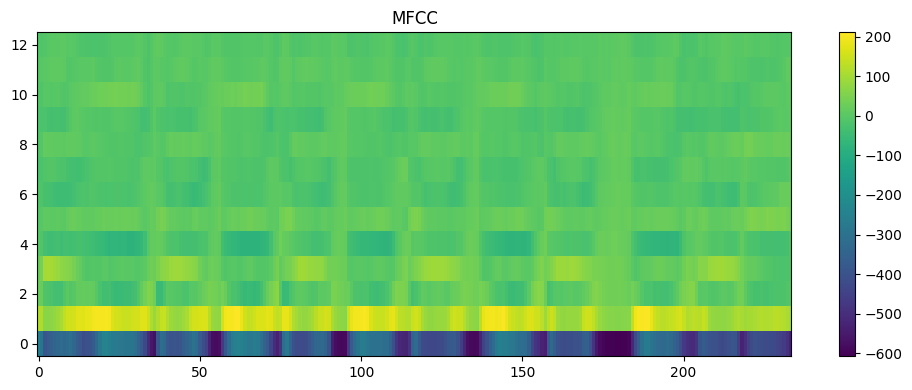

In [ ]:
import matplotlib.pyplot as plt

def plot_mfcc(mfcc, title="MFCC"):
    plt.figure(figsize=(10, 4))
    plt.imshow(mfcc, cmap='viridis', origin='lower', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_mfcc(mfcc_dict['dysarthria_female']['F01_Session1_0002.wav'])

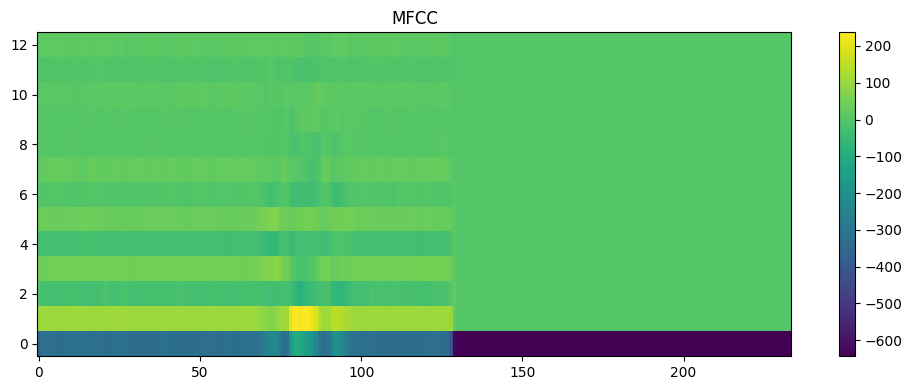

In [23]:
plot_mfcc(mfcc_dict['non_dysarthria_female']['FC01_Session1_0008.wav'])